In this notebook we will simulate First Passage Percolation on the Two-Dimensional Integer lattice, and illustrate the convergence in measure of the rescaled ball of radius n 1/n*B_n to a fixed shape. 

(TODO: double check) While this convergence was proved in 1990 by Boivin, to the author's best knowledge, the shape that the balls converge _to_ is yet undetermined.

In [226]:
import numpy as np
from numpy import array, linalg, sqrt, inf
import random
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
%matplotlib inline

In [290]:
def add_tuple(t1, t2): #python dicts can't have arrays as keys, so we'll use tuples. We'll need to add tuples later.
    return(tuple(map(sum, zip(t1, t2))))

def tuple_to_np(pts):
    return(np.array([np.array(x) for x in pts]))

def get_l1_norm(tuple):
    return(np.linalg.norm(np.array(tuple), ord=1))

def get_random_weight():
    return(random.choice([1,2]))

def initialize_points(N):
    '''Use L-infinity norm to initialize relevant integer points'''
    pts = {(x,y) for x in range(-N, N+1) for y in range(-N,N+1)}
    return(pts)

def initialize_edges_and_weights(N):
    pts = initialize_points(N)
    edges = {}
    for pt in pts:
        for unit_vector in [(1,0), (0,1)]:
            if add_tuple(pt, unit_vector) in pts:
                edges[(pt, add_tuple(pt, unit_vector))] = get_random_weight()
    return(pts, edges)

def get_costs(N):
    #assign a cost to each point by iterating over L1 norm
    pts, edges = initialize_edges_and_weights(N)
    costs = {}
    
    costs[(0,0)] = 0
    for k in range(1,N+1):
        Bk = [pt for pt in pts if get_l1_norm(pt)==k]
        for pt in Bk:
            #find euclidean geodesic extensions to pt by checking if cost of preceding point is calculated
            #find associated costs. take min.
            #this is avoiding hard-coding logic about the quadrant the current point is in
            curr_costs = []
            if get_l1_norm(add_tuple(pt, (1,0))) == k-1:
                incremental_cost = edges[(pt, add_tuple(pt, (1,0)))]
                total_cost = costs[add_tuple(pt, (1,0))] + incremental_cost
                curr_costs.append(total_cost)
            if get_l1_norm(add_tuple(pt, (0,1))) == k-1:
                incremental_cost = edges[(pt, add_tuple(pt, (0,1)))]
                total_cost = costs[add_tuple(pt, (0,1))] + incremental_cost
                curr_costs.append(total_cost)
            if get_l1_norm(add_tuple(pt, (-1,0))) == k-1:
                incremental_cost = edges[(add_tuple(pt, (-1,0)), pt)]
                total_cost = costs[add_tuple(pt, (-1,0))] + incremental_cost
                curr_costs.append(total_cost)
            if get_l1_norm(add_tuple(pt, (0,-1))) == k-1:
                incremental_cost = edges[(add_tuple(pt, (0,-1)), pt)]
                total_cost = costs[add_tuple(pt, (0,-1))] + incremental_cost
                curr_costs.append(total_cost)
            curr_cost = min(curr_costs)
            costs[pt] = curr_cost
    return(edges, costs)

def rescale_ball(arr, m):
    return(arr/m)

def plot_ball(m, costs, plot_pts=False):
    '''Plot ball of radius m in the random geometry represented by `costs`.'''
    pts = [pt for pt in costs.keys() if costs[pt] == m]
    pts_arr = tuple_to_np(pts)
    pts_arr = rescale_ball(arr=pts_arr, m=m)
    hull = ConvexHull(points=pts_arr)
    if plot_pts:
        plt.plot(pts_arr[:,0], pts_arr[:,1], 'o')
    for simplex in hull.simplices:
        plt.plot(pts_arr[simplex, 0], pts_arr[simplex, 1], 'k-', linewidth=0.5)

def plot_L1_circle():
    """ plot 2D vectors with L1-norm = .75 """
    x_pos = np.linspace(0,.75,100)
    y_pos = (.75-x_pos)
    plt.scatter(x=x_pos, y=y_pos, color='red', s=1)
    plt.scatter(x=-1*x_pos, y=-1*y_pos, color='red', s=1)
    plt.scatter(x=-1*x_pos, y=y_pos, color='red', s=1)
    plt.scatter(x=x_pos, y=-1*y_pos, color='red', s=1)

def plot_L2_circle():
    """ plot 2D vectors with L1-norm = .75 """
    angles = np.linspace(0, 2 * np.pi, 100)
    xs = np.cos(angles) * .75
    ys = np.sin(angles) * .75
    plt.plot(xs, ys, color = 'red')
    
def run_simulation(num_iterations, N):
    for i in range(num_iterations):
        edges, costs = get_costs(N=N)
        plot_ball(m=N, costs=costs)
    #overlay L1 and L2 ball of radius 7.5 to see balls appear to be converging to one of them
    plot_L1_circle()
    plot_L2_circle()

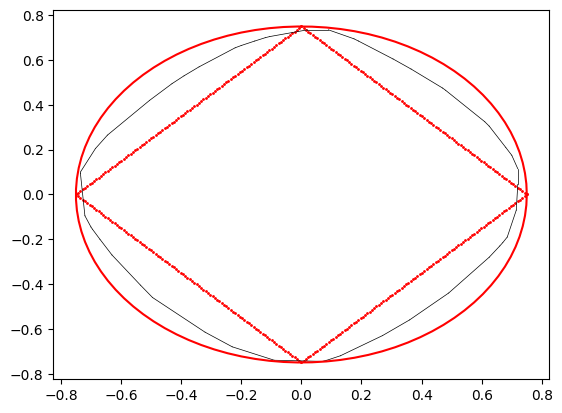

In [292]:
run_simulation(num_iterations=1, N=200)

Question: 
- are the balls converging to the ball of radius .75 in some L^p metric? Is it 1.5?
- 